In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Pandas is a newer package built on top of NumPy
- Designed to make working with structured data (like tables or spreadsheets) easy and intuitive

# Intro

## The Pandas Series Object

- Series is an analog of a one-dimensional array with flexible indices
- The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
# data.index
# data['b']
data.values

array([0.25, 0.5 , 0.75, 1.  ])

### Series as specialized dictionary

- Pandas Series a bit like a specialization of a Python dictionary
- Series is a structure which maps typed keys to a set of typed values
- Can be made even more clear by constructing a Series object directly from a Python dictionary


In [7]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [9]:
# Slicing
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

## Pandas dataframe object

- DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names
- DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data
- A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series

<br>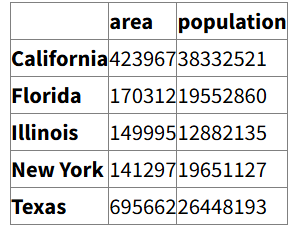

In [11]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# index attribute that gives access to the index labels
states.index

# columns attribute, which is an Index object holding the column labels
# states.columns

# values attribute
# states.values

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
# DataFrame as specialized dictionary
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [14]:
# Constructing DataFrame objects
# From a single Series object
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [16]:
# From dictionary of Series objects
data = pd.DataFrame({'population': population,
                     'area': area})
data

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [17]:
# From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.116012,0.675708
b,0.819435,0.723292
c,0.260787,0.964786


In [18]:
# From a NumPy structured array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Pandas Index object

- Immutable array & Ordered set
- Facilitate operations such as joins across datasets
- Used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way

In [19]:
# The Pandas Index Object (immutable array)
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [20]:
# Index as ordered set (intersection, union, difference, symmetric difference)
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB  # intersection
indA | indB  # union
indA ^ indB  # symmetric difference

Index([3, 0, 0, 0, 2], dtype='int64')

# Data Indexing and Selection

## Data selection in series

- A Series object acts in many ways like a one-dimensional NumPy array

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

# Series as dictionary
# data['b']

# using python expressions
# 'a' in data

# data.keys()

# Series objects can be modified with a dictionary-like syntax
data['e'] = 1.25

## Series as one-dimensional array

In [ ]:
# slicing by explicit index
data['a':'c']

# slicing by implicit integer index
# data[0:2]

# masking
# data[(data > 0.3) & (data < 0.8)]

# fancy indexing
# data[['a', 'e']]

## Indexers: loc, iloc and ix (deprecated)

- Slicing and indexing conventions can be a source of confusion:
  - 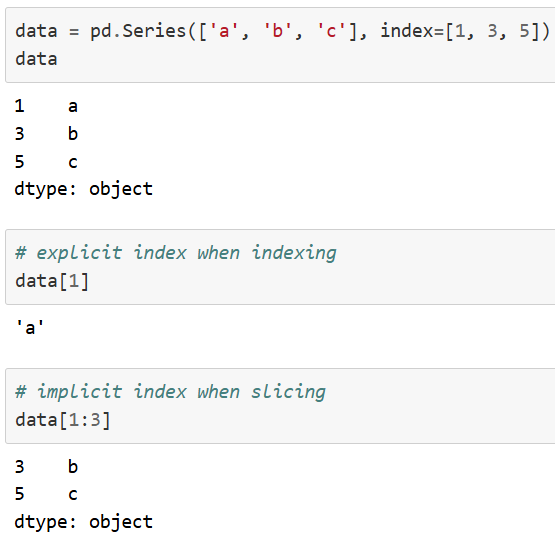
- Not functional methods, but attributes that expose a particular slicing interface to the data in the Series

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

# loc attribute allows indexing and slicing that always references the explicit index
# data.loc[3: 5]

# iloc attribute allows indexing and slicing that always references the implicit Python-style index
# data.iloc[1]


'b'

## Data selection in DataFrame

- Acts in many ways like a two-dimensional or structured array
- In other ways like a dictionary of Series structures

### DataFrame as a dictionary

In [29]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# Accessing columns
# data['area']

# equivalent to
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [32]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Additional indexing conventions

In [ ]:
# data['Florida':'Illinois']

# data[1:3]

data[data.density > 100]